In [1]:
import pandas as pd
from pandas import DataFrame

#import data from csv

vaccination = pd.read_csv("data/covid-vaccination-policy.csv")
transport = pd.read_csv("data/public-transport-covid.csv")
stay_home = pd.read_csv("data/stay-at-home-covid.csv")

face_cover = pd.read_csv("data/face-covering-policies-covid.csv")
owid = pd.read_csv("data/owid-covid-data.csv")


#Series with g20 members according to wikipedia + spain
g20_members = pd.Series(["Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", "Indonesia", "Italy", "Japan", "South Korea", "Mexico", "Russia", "Saudi Arabia", "South Africa", "Turkey", "United Kingdom", "United States", "Spain", "European Union"])

#filter data array for locations that match g20 countries
g20_data = owid[owid["location"].isin(g20_members)].reset_index(drop=True)

### FaceCover

In [2]:
g20_face_cover = face_cover[face_cover["Entity"].isin(g20_members)].reset_index(drop=True)

In [4]:
phases = []

for country in g20_members:
    df = g20_face_cover[g20_face_cover["Entity"] == country].reset_index(drop=True)
    level = 0
    for index, row in df.iterrows():
        if row["facial_coverings"] != level:
            phases.append([country, row["Day"], row["facial_coverings"]])
            level = row["facial_coverings"]
                           
    
face_cover_phases = DataFrame(phases, columns=["country","date","level_changes"]).dropna(how="all").reset_index(drop=True)
face_cover_phases["date"] = pd.to_datetime(face_cover_phases["date"], yearfirst=True)
face_cover_phases

,country,date,level_changes
0,Argentina,2020-04-14,3
1,Australia,2020-07-13,1
2,Australia,2020-07-30,4
3,Australia,2020-11-22,2
4,Australia,2021-01-08,4
...,...,...,...
63,United States,2020-04-06,3
64,United States,2020-07-01,4
65,Spain,2020-05-04,2
66,Spain,2020-05-21,3


C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ching\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

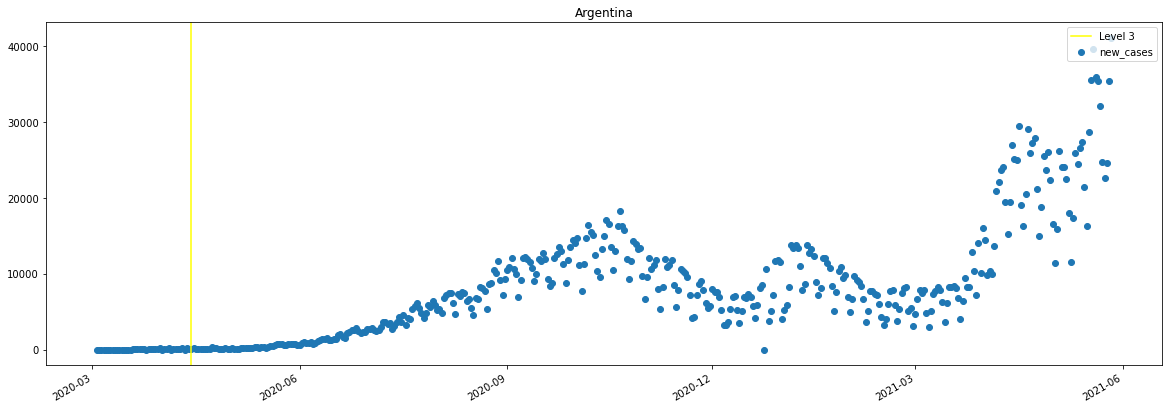

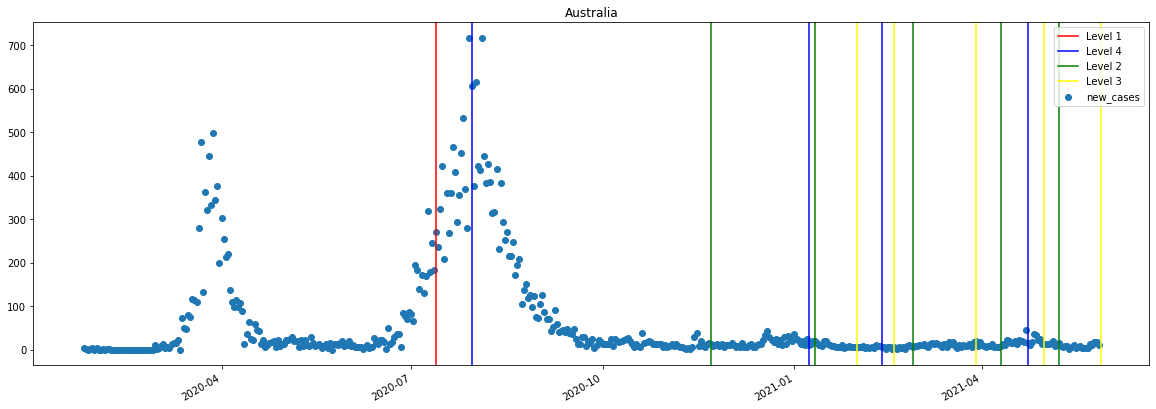

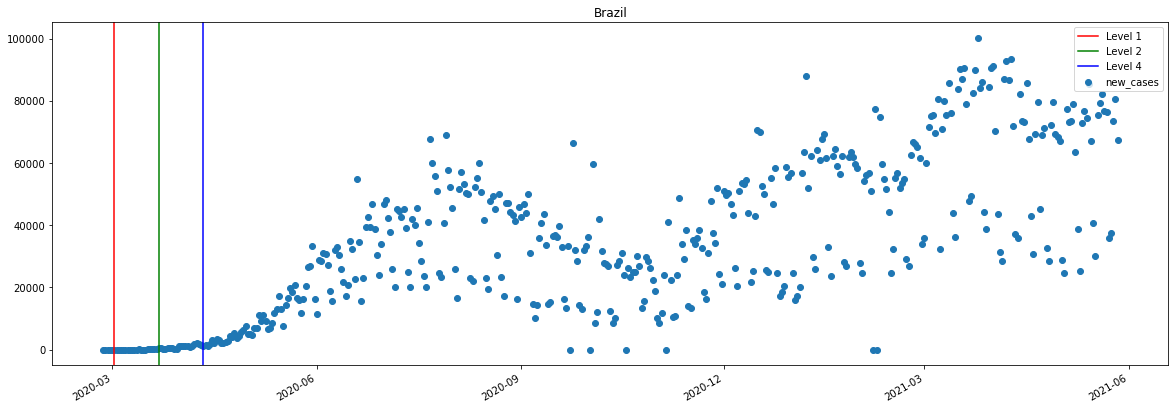

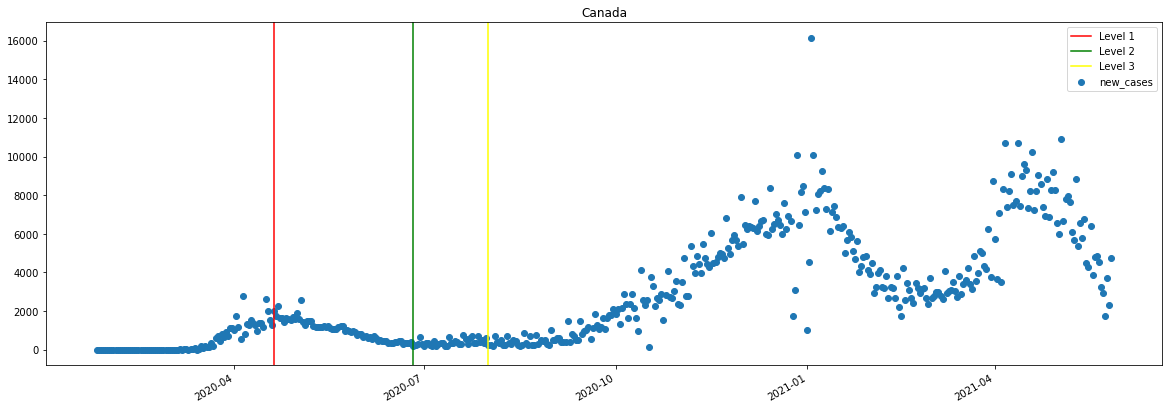

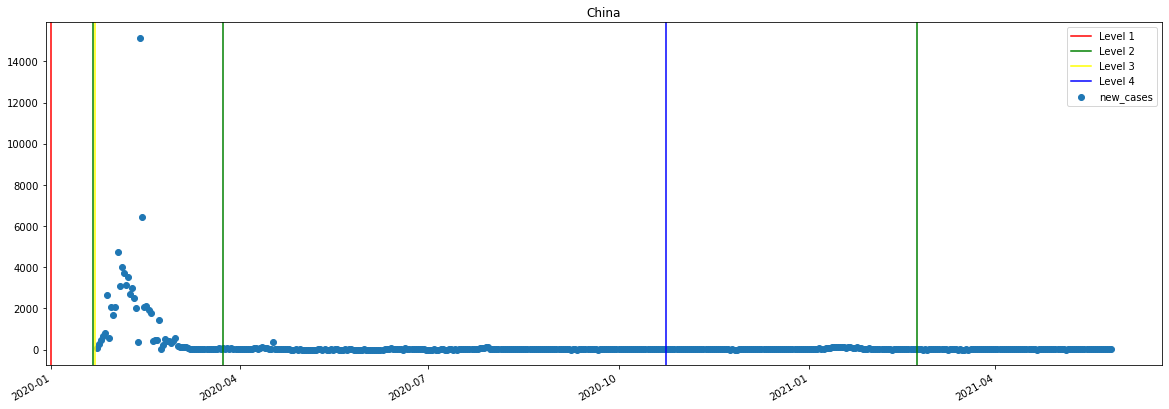

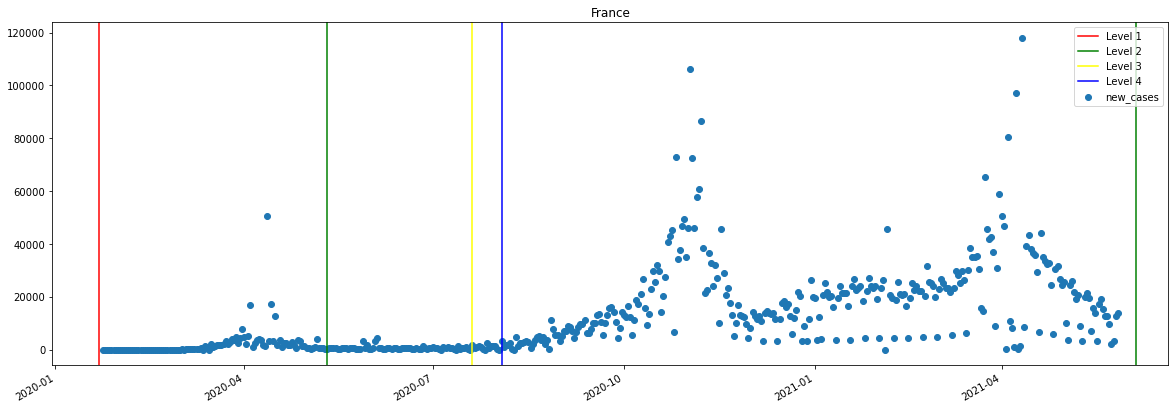

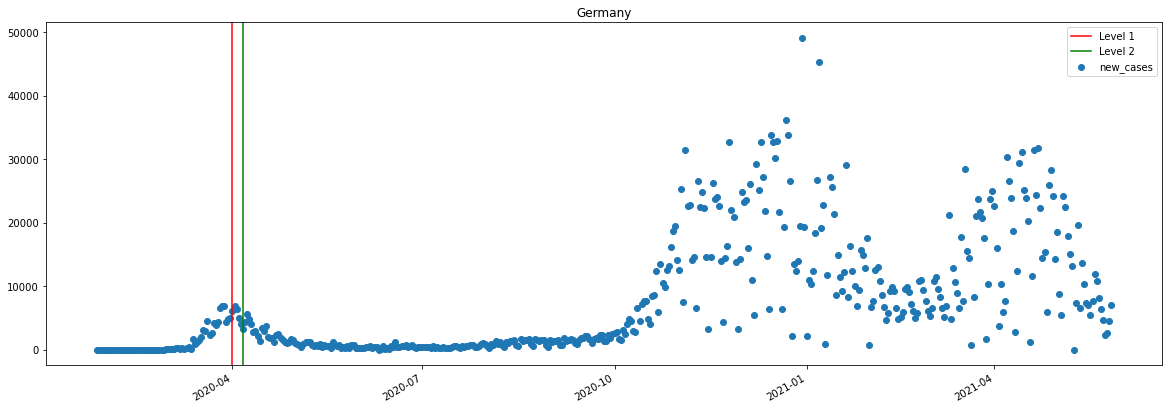

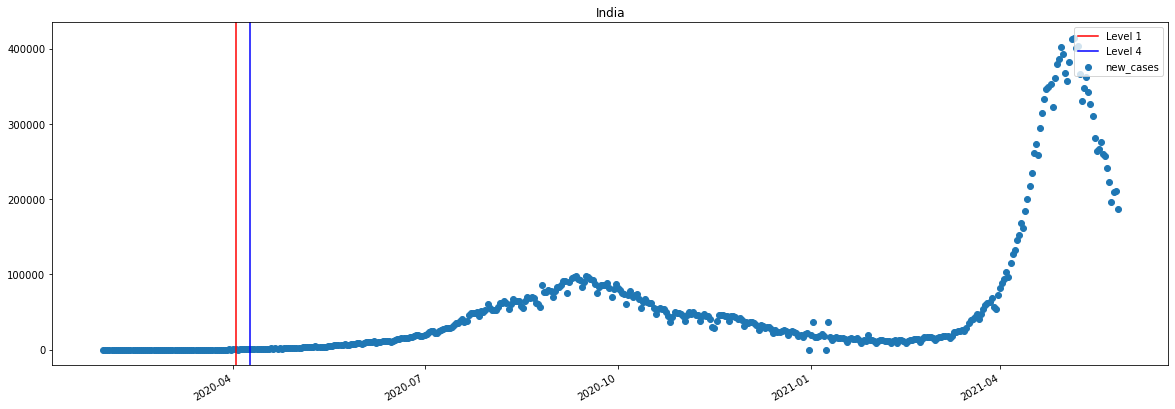

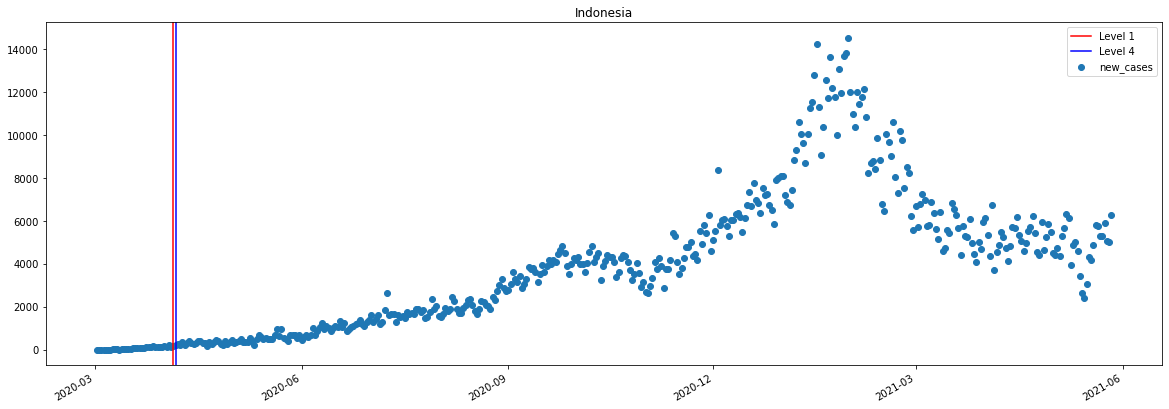

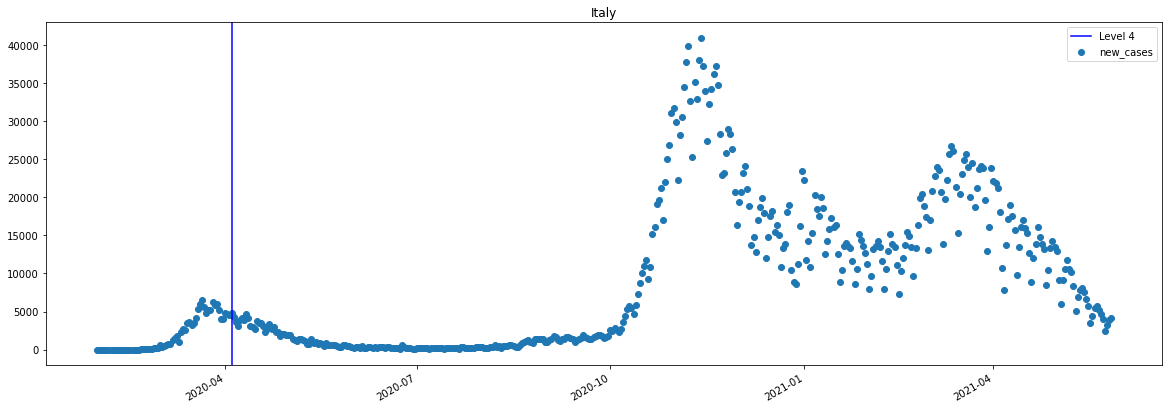

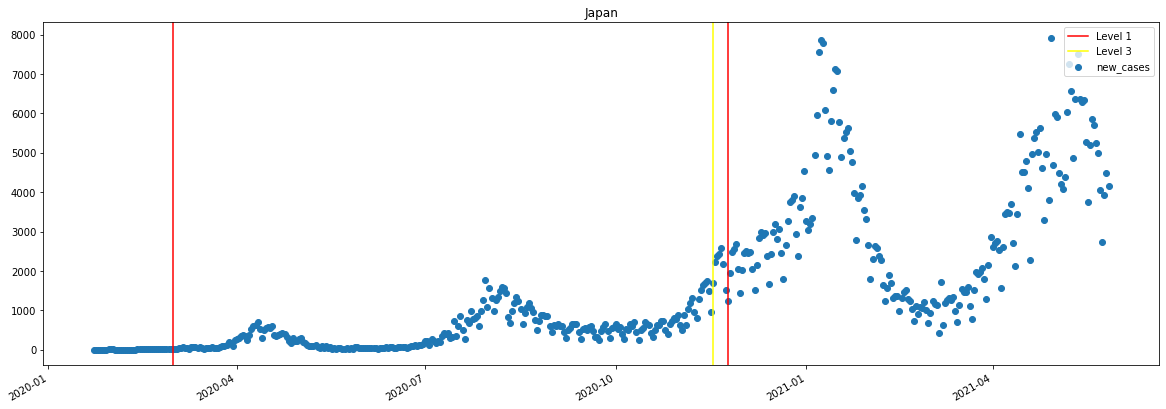

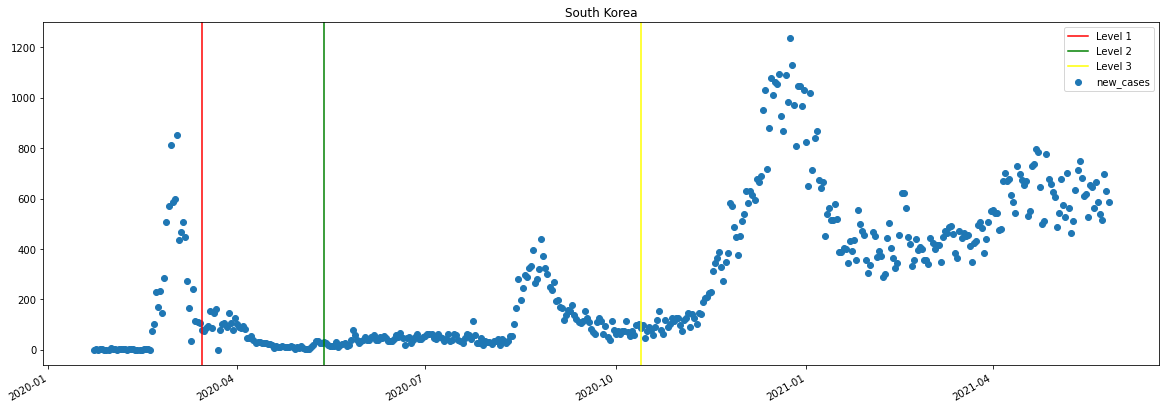

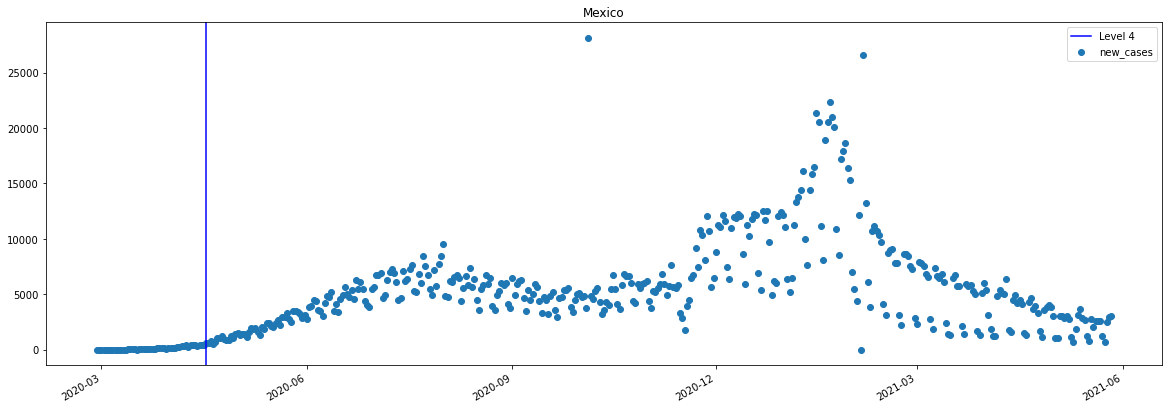

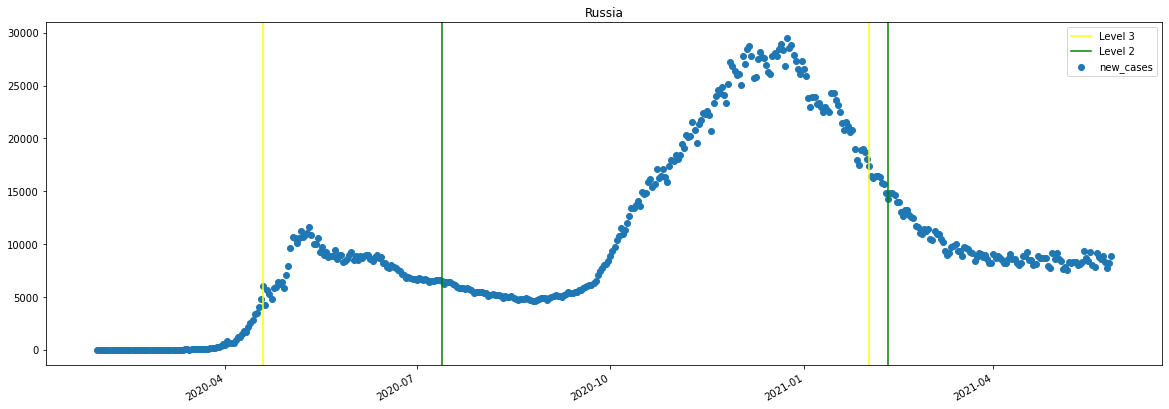

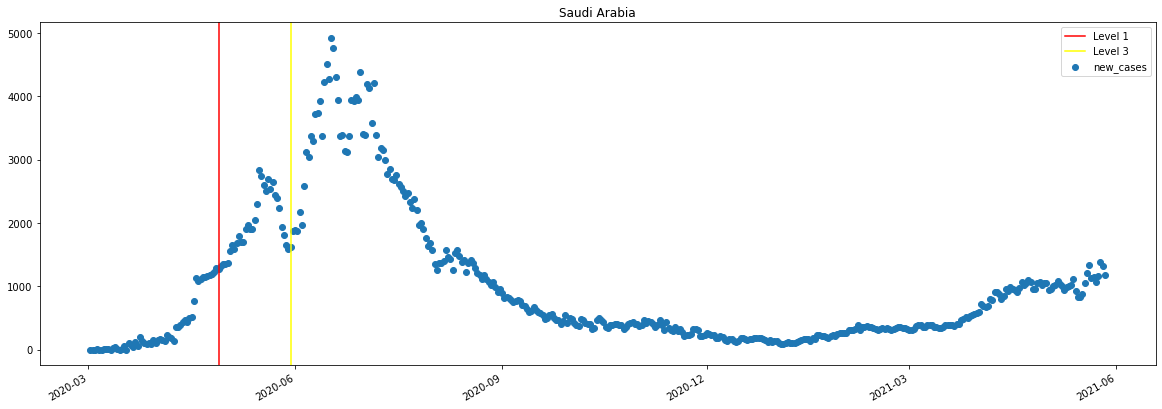

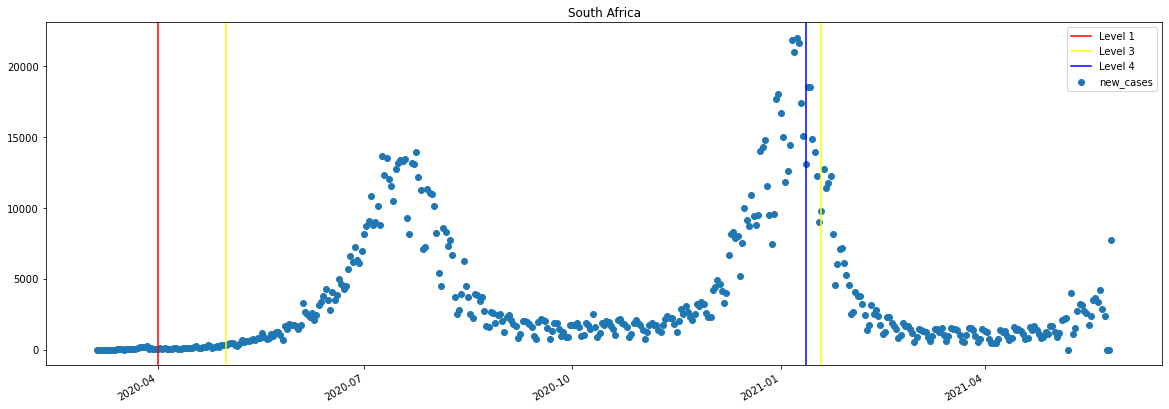

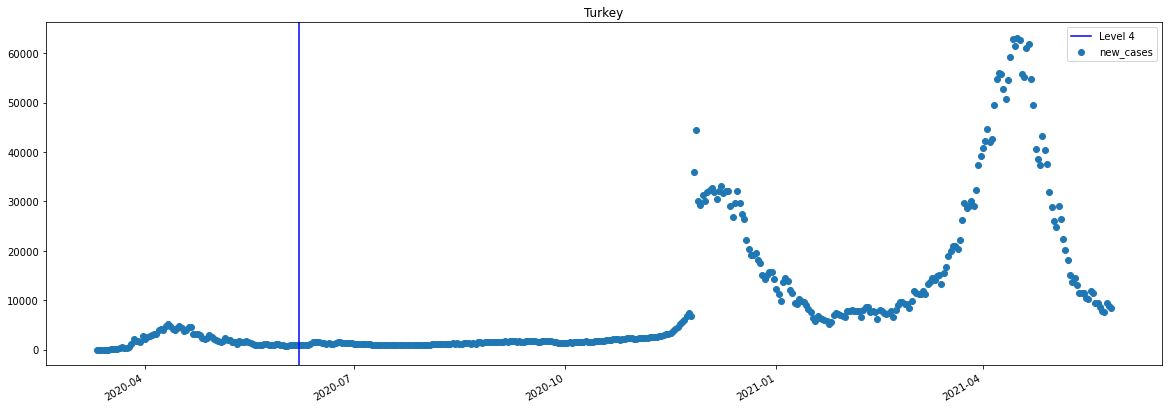

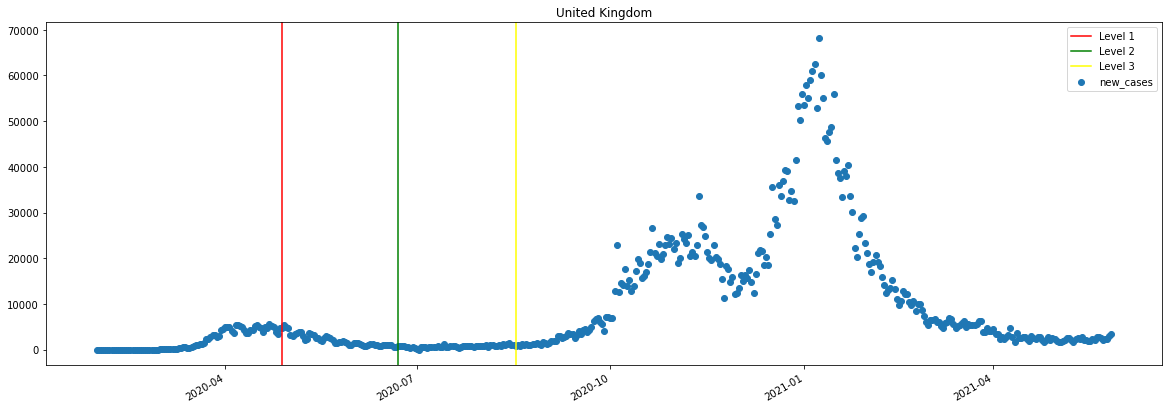

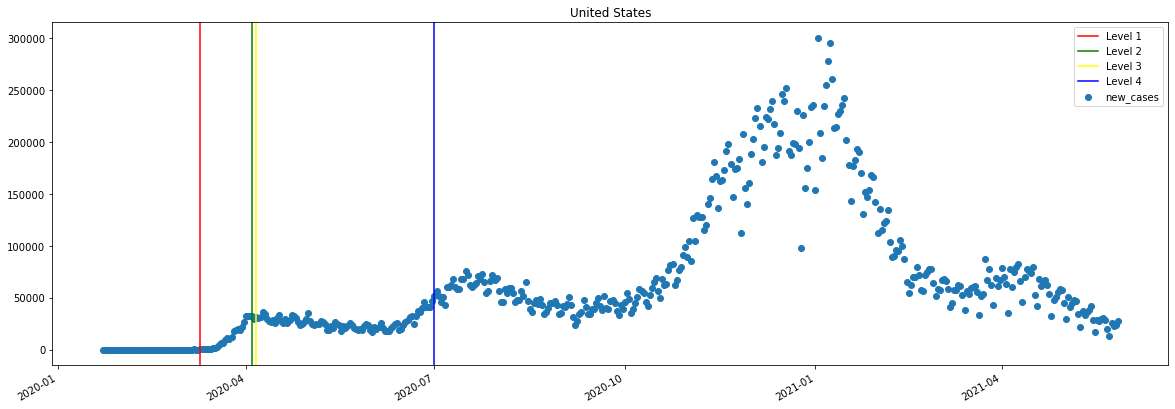

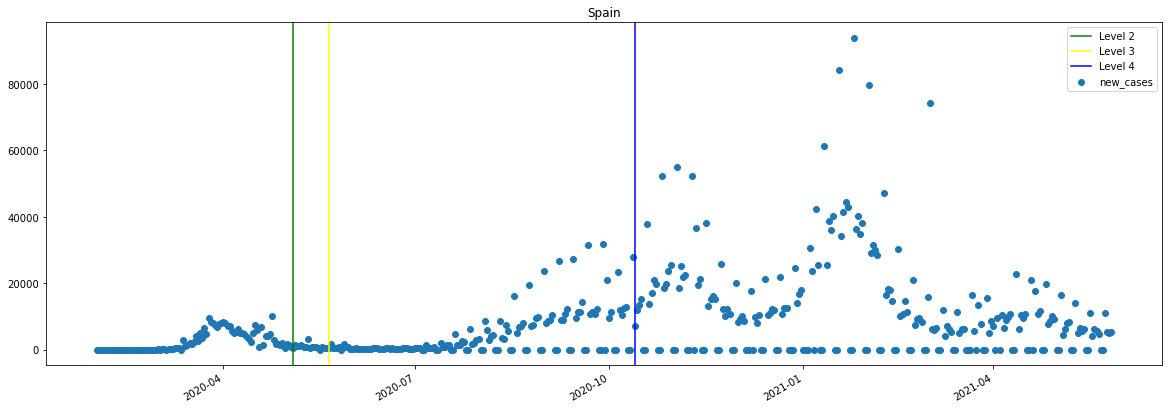

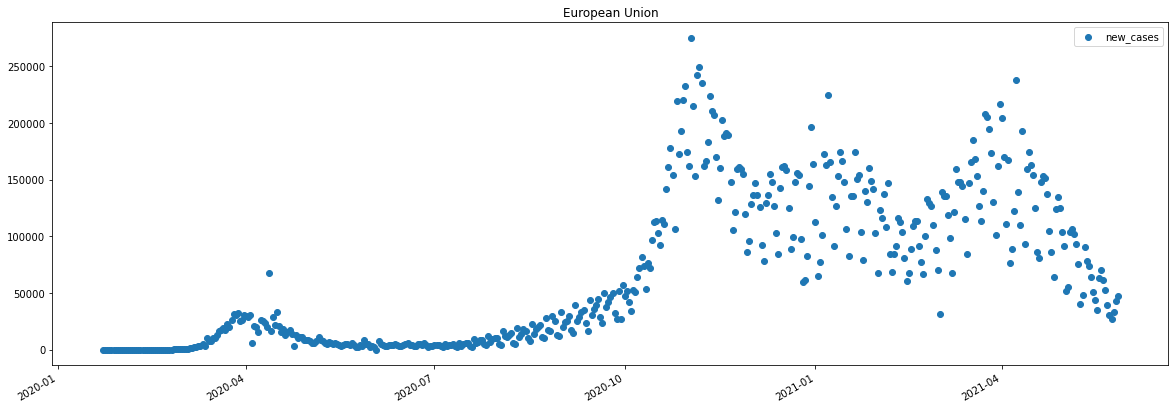

'\nf.fig.autofmt_xdate()\nf.set_ylabels("mean_new_cases")\nf.fig.suptitle(loc)\n'

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import OrderedDict
#plot each countries in g20
for loc in g20_members:
    only_pain = g20_data[g20_data["location"]==loc]
    phase = face_cover_phases[face_cover_phases["country"]==loc]
    #make sure date is in datetime format
    only_pain["date"] = pd.to_datetime(only_pain["date"], yearfirst=True)
    only_pain["month"] = only_pain.date.dt.month_name()
    only_pain["year"] = only_pain.date.dt.year
    
    #negative to positive
    only_pain["new_cases"] = only_pain["new_cases"].map(lambda x: abs(x), na_action="ignore")
    #plot
    
    fig, ax = plt.subplots(figsize=(20,7))
    ax.scatter("date", "new_cases", data = only_pain)
    fmt_every_month = mdates.MonthLocator(interval=3)
    ax.xaxis.set_major_locator(fmt_every_month)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()
    plt.title(loc)
    colors = ["red", "green", "yellow", "blue"]
    
    for ind, data in phase.iterrows():
        plt.axvline(data[1], color = colors[int(data[2])-1], label = f"Level {int(data[2])}")
        
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),loc="upper right")
    plt.show()
    
"""
f.fig.autofmt_xdate()
f.set_ylabels("mean_new_cases")
f.fig.suptitle(loc)
"""
    

### Vaccine

### Travel Restriction

### Stay at home